In [1]:
%matplotlib inline

In [2]:
import numpy.random # generate noisy/random data
from sklearn import linear_model # training linear model

import matplotlib.pyplot # general plotting
from mpl_toolkits.mplot3d import Axes3D # 3d plotting

import pandas as pd
import numpy as np 
import operator # used for sorting array of tuples 

In [3]:
MIN_X = -15
MAX_X = 15
NUM_INPUTS = 100

In [4]:
ran_x = numpy.random.uniform(low=MIN_X, high=MAX_X, size=(NUM_INPUTS, 1)) # type: [[float]]

dataset = pd.DataFrame(data=ran_x, columns=['x'])
dataset.head()

,x
0,-3.864908
1,7.929145
2,7.022602
3,-1.336576
4,7.743292


<AxesSubplot:xlabel='x', ylabel='y'>

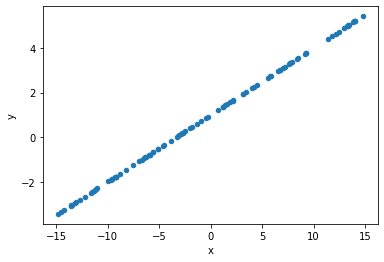

In [5]:
dataset['y'] = 0.3*dataset['x']+1 # line is y = 0.3x + 1, no noise yet
dataset.plot.scatter(x='x', y='y')

In [6]:
noise_y = numpy.random.normal(size=NUM_INPUTS) # generate noise using normal distribution  
dataset['y'] = dataset['y']+noise_y # add noise to dataset 

<AxesSubplot:xlabel='x', ylabel='y'>

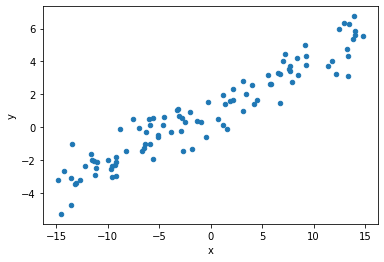

In [7]:
dataset.plot.scatter(x='x', y='y')

In [8]:
model_one = linear_model.LinearRegression() # unfitted model

In [9]:
print(dataset['x']) # see current shape of data 
print(dataset['y']) # see current shape of data 
reshaped_x = dataset['x'].values.reshape(-1, 1)
reshaped_y = dataset['y'].values.reshape(-1, 1)
print(reshaped_x) # see new shape 
print(reshaped_y) # see new shape

0     -3.864908
1      7.929145
2      7.022602
3     -1.336576
4      7.743292
        ...    
95     7.587812
96    -8.240132
97    13.214888
98     1.158342
99    -6.287751
Name: x, Length: 100, dtype: float64
0    -0.272748
1     2.739814
2     4.008239
3     0.383962
4     3.754576
        ...   
95    3.567241
96   -1.466820
97    4.739434
98    0.160640
99   -0.268969
Name: y, Length: 100, dtype: float64
[[ -3.86490769]
 [  7.92914515]
 [  7.02260162]
 [ -1.33657597]
 [  7.74329183]
 [  2.12165846]
 [-13.08374688]
 [ -5.08462858]
 [  6.57029599]
 [  0.68847066]
 [-13.56982128]
 [  6.74095856]
 [  3.16753717]
 [ -6.96364249]
 [-11.29128781]
 [ -7.58113321]
 [ -3.16425856]
 [ 12.15383306]
 [ -3.30055222]
 [ -6.00288111]
 [  4.53655056]
 [ -9.22918286]
 [ 12.46595755]
 [ -0.45338778]
 [  3.13084194]
 [  7.17732144]
 [ 14.03694611]
 [  4.21330584]
 [ -5.93629077]
 [ -9.6775231 ]
 [ 12.96059787]
 [ 11.78769895]
 [-12.24599993]
 [ -9.23344805]
 [  7.71170786]
 [ -9.64313949]
 [ -5.617

In [10]:
model_one.fit(X=reshaped_x, y=reshaped_y) # fit model to data 

LinearRegression()

In [11]:
# function to print weights of model 
def print_model_fit(model):
    print('Intercept: {i} Coefficients: {c}'.format(i=model.intercept_, c=model.coef_))

In [12]:
print_model_fit(model_one) 

Intercept: [1.03930473] Coefficients: [[0.30581112]]


In [13]:
new_x_values = [[-1.23], [0.66], [1.98]] # some random values to predict 
predictions = model_one.predict(new_x_values) 
for datapoint, prediction in zip(new_x_values, predictions):
    print('Model prediction for {}: {}'.format(datapoint[0], prediction[0]))

Model prediction for -1.23: 0.6631570573029864
Model prediction for 0.66: 1.2411400686134806
Model prediction for 1.98: 1.6448107431795402


In [14]:
# scatter data and draw line on the same graph 
def linear_regression_against_data(model, data_x, data_y, MIN_X, MAX_X):
        fig = matplotlib.pyplot.figure(1)
        fig.suptitle('Data vs Regression')
        matplotlib.pyplot.xlabel('x-axis')
        matplotlib.pyplot.ylabel('y-axis')
        
        matplotlib.pyplot.scatter(data_x, data_y)
        
        all_X = numpy.linspace(MIN_X, MAX_X)
        all_Y = model.predict(list(zip(all_X)))
        matplotlib.pyplot.plot(all_X, all_Y)

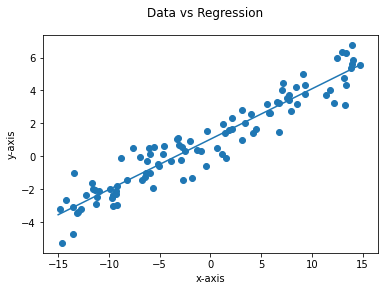

In [15]:
linear_regression_against_data(model_one, reshaped_x, reshaped_y, MIN_X, MAX_X)

# Exercise Option #1 - Standard Exercise:
Answers to questions about dataset 1. 
1. I expected `print_model_fit()` to print numbers similar to: `Intercept: [1] Coefficients: [[0.3]]` because the line used to make the data was y = 0.3x + 1. 
2. The expected numbers the model should have outputted when given the new numbers would be the num*.3 + 1 (if the model was perfect). So given the x-values -1.23, 0.66, and 1.98, I expected the model to predict the y-values 0.631, 1.198, and 1.594.
3. I expected the line to generally follow the trend of all the points. 
4. The line of code I would change would be `dataset['y'] = 0.3*dataset['x']+1`. I would first change 0.3 to an arbitrary number, say 5.5, and would then run all the code after that. I would make sure that the output of `print_model_fit(model_one)` reported a new coefficent, one close to the new arbitrary number. This would make sure that the model didn't just happen to work with only m=0.3. A similar approach would be taken for the y-intercept. Doing both of these would ensure that the model was working properly. 

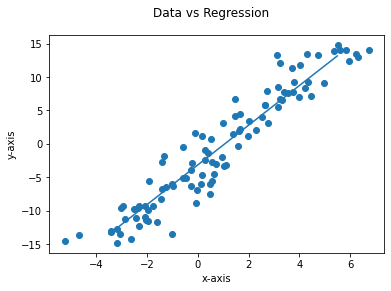

In [16]:
model_two = linear_model.LinearRegression()
model_two.fit(X=reshaped_y, y=reshaped_x) # swapping x and y
# since x and y have been swapped, we have to use the min and max y-values 
MIN_Y = 0.3*MIN_X+1
MAX_Y = 0.3*MAX_X+1
linear_regression_against_data(model_two, reshaped_y, reshaped_x, MIN_Y, MAX_Y)

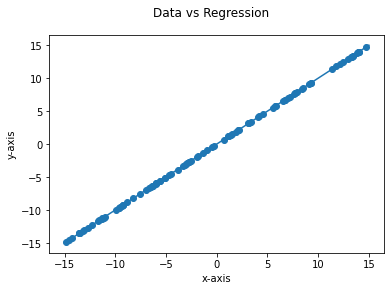

In [17]:
model_three = linear_model.LinearRegression()
model_three.fit(X=reshaped_x, y=reshaped_x) # y = x
linear_regression_against_data(model_three, reshaped_x, reshaped_x, MIN_X, MAX_X)

In [18]:
MIN_X_3D = -10
MAX_X_3D = 10
NUM_INPUTS_3D = 50

noise_3d = numpy.random.normal(size=NUM_INPUTS_3D)
x_3d = numpy.random.uniform(low=MIN_X_3D, high=MAX_X_3D, size=NUM_INPUTS_3D)
y_3d = numpy.random.uniform(low=MIN_X_3D, high=MAX_X_3D, size=NUM_INPUTS_3D)

z_3d = 0.5*x_3d - 2.7*y_3d - 2 + noise_3d

In [19]:
data_3d = pd.DataFrame(data=x_3d, columns=['x'])
data_3d['y'] = y_3d
data_3d['z'] = z_3d

data_3d.head()

,x,y,z
0,-1.206263,0.497354,-3.282630
1,8.312677,-2.473465,7.724351
2,-2.627468,2.568953,-9.503677
3,-5.964255,-4.700636,9.063632
4,6.275358,5.357341,-14.551501


In [20]:
model_3d = linear_model.LinearRegression()
model_3d.fit(data_3d[['x', 'y']], data_3d['z']) # why don't we have to reshape data in this example?

print_model_fit(model_3d)

Intercept: -2.0564585043544197 Coefficients: [ 0.44247043 -2.71457153]


In [21]:
def plot_3d(model, x, y, z, min, max):
    fig = matplotlib.pyplot.figure(1)
    fig.suptitle('3D Data vs Linear Plane')

    axes = fig.gca(projection='3d') 
    axes.set_xlabel('x')
    axes.set_ylabel('y')
    axes.set_zlabel('z')
    
    axes.scatter(x, y, z)
    
    X = Y = numpy.arange(min, max, 0.05)
    X, Y = numpy.meshgrid(X, Y)
    Z = numpy.array(model.predict(list(zip(X.flatten(), Y.flatten())))).reshape(X.shape)
    
    axes.plot_surface(X, Y, Z, alpha=0.1)
    matplotlib.pyplot.show()

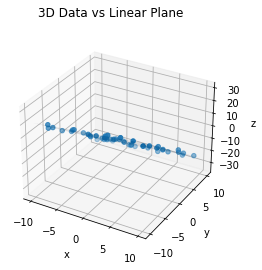

In [22]:
plot_3d(model_3d, x_3d, y_3d, z_3d, MIN_X_3D, MAX_X_3D)

# Exercise Option #2 - Standard Difficulty

1. I expected `print_model_fit()` to print: `Intercept: [-2] Coefficients: [0.5 -2.7]` because the line used to make the data was z = 0.5x - 2.7y - 2. 
2. I expected all the data to generally lie on the plane, because the plane is supposed to fit the general trend of the data. 
3. I would take the same approach to the 2D dataset to check if the linear regression code was working properly I would change the line `z_3d = 0.5*x_3d - 2.7*y_3d - 2 + noise_3d` by changing the coefficients. Then, I would check if `print_model_fit()` changed to reflect the new values.  
4. There were a few minor differences between working with this and the 2D dataset. One was that the data did not have to be reshaped (not sure why), as well as some more code had to be written to graph the 3D data and mesh.

# Exercise Option #3 - Advanced Difficulty
Write some code that will better fit quadratic data. 

In [23]:
MIN_X_QUAD = 0
MAX_X_QUAD = 20
NUM_INPUTS_QUAD = 50
x_quadratic = numpy.random.uniform(low=MIN_X_QUAD, high=MAX_X_QUAD, size=(NUM_INPUTS_QUAD, 1))
data_quadratic = pd.DataFrame(data=x_quadratic, columns=['x'])

In [24]:
noise_quadratic = numpy.random.normal(size=NUM_INPUTS_QUAD)

In [25]:
# y = x^2 - 20x + 1.5
# vertex: -b/2a = 10 
data_quadratic['y'] = data_quadratic['x']*data_quadratic['x']-20*data_quadratic['x']+1.5+noise_quadratic

Intercept: [-66.38690446] Coefficients: [[-0.2962594]]


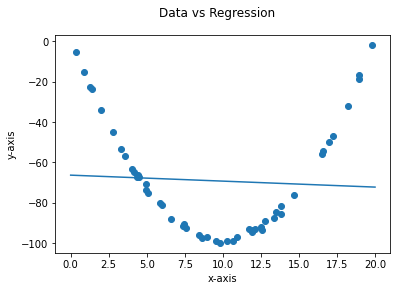

In [26]:
x_quadratic = data_quadratic['x'].values.reshape(-1, 1)
y_quadratic = data_quadratic['y'].values.reshape(-1, 1)
model_quadratic = linear_model.LinearRegression() # generate model
model_quadratic.fit(x_quadratic, y_quadratic) # fit model
# show results
print_model_fit(model_quadratic)
linear_regression_against_data(model_quadratic, x_quadratic, y_quadratic, MIN_X_QUAD, MAX_X_QUAD)

In [27]:
half = int(NUM_INPUTS_QUAD/2)
# learned how reshape() works from https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape
# reshape x and y data to 1D arrays 
x_quadratic = x_quadratic.reshape(1, -1)[0]
y_quadratic = y_quadratic.reshape(1, -1)[0]
# combine x and y data into array of tuples where in each tuple, first element is x and second is y 
x_y_combined = []
for i in range(0, NUM_INPUTS_QUAD):
    x_y_combined.append((x_quadratic[i], y_quadratic[i]))
# learned how to sort from https://algocoding.wordpress.com/2015/04/14/how-to-sort-a-list-of-tuples-in-python-3-4/#:~:text=Note%3A%20As%20usual%20in%20programming,itemgetter(1)%20.&text=If%20we%20want%20to%20sort,we%20simply%20set%20reverse%20%3D%20True%20.
# sort x and y data by x values, ascending
x_y_combined.sort(key = operator.itemgetter(0))

x_quadratic = []
y_quadratic = []
for tuple in x_y_combined:
    x_quadratic.append([tuple[0]])
    y_quadratic.append([tuple[1]])
# split sorted dataset into two halves
x_quadratic_left = x_quadratic[0:half]
y_quadratic_left = y_quadratic[0:half]
x_quadratic_right = x_quadratic[half:(NUM_INPUTS_QUAD-1)]
y_quadratic_right = y_quadratic[half:(NUM_INPUTS_QUAD-1)]

In [28]:
model_quadratic_left = linear_model.LinearRegression() # generate left-half model
model_quadratic_left.fit(x_quadratic_left, y_quadratic_left) # fit left-half model
model_quadratic_right = linear_model.LinearRegression() # generate right-half model
model_quadratic_right.fit(x_quadratic_right, y_quadratic_right) # fit right-half model

LinearRegression()

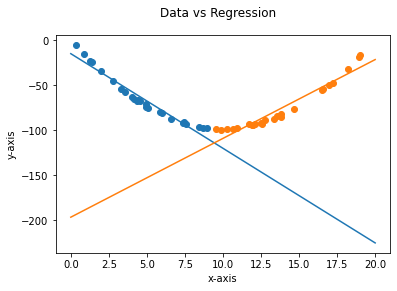

In [29]:
linear_regression_against_data(model_quadratic_left, x_quadratic_left, y_quadratic_left, MIN_X_QUAD, MAX_X_QUAD)
linear_regression_against_data(model_quadratic_right, x_quadratic_right, y_quadratic_right, MIN_X_QUAD, MAX_X_QUAD)

# My Solution to Exercise #3
As you can see in my code above, I first sorted the data by x-value, ascending. I then split the data into halves, with the first half being the left side of the parabola and the second half being the right side of the parabola. I then fit a model to each half.

There is one problem with this approach: it assumes there is an equal amount of data of the left and right halves. When generating my data I kept this in mind to ensure that my approach would work.

One potential method of getting around this issue is by determining the vertex of the parabola and then splitting the data accordingly. This in practice is quite difficult: you can't just pick the datapoint that has the smallest y-value, because that doesn't take in account that the parabola may open downwards. 

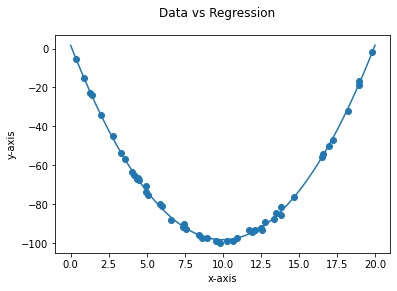

In [30]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
degree = 2 # quadratic 
model_polynomial=make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression()) # make model
# from my understanding, what the above code does is replace the matrix used for the regression with a polynomial version of it
model_polynomial.fit(x_quadratic, y_quadratic) # fit model
linear_regression_against_data(model_polynomial, x_quadratic, y_quadratic, MIN_X_QUAD, MAX_X_QUAD)

# My Second Solution to Exercise #4
I just looked into the sklearn documentation on how to properly do polynomial regression. 

# Exercise Option #4 - Advanced Difficulty

Add some [regularization](https://jennselby.github.io/MachineLearningCourseNotes/#regularization-ridge-lasso-and-elastic-net) to your linear regression model. 

Intercept: [1.03924726] Coefficients: [[0.3057291]]
Intercept: [1.03930473] Coefficients: [[0.30581112]]
Training data. With regularization: 0.9059840088201817. Without regularization: 0.9059840739875882. Diff: -6.516740647111163e-08
Test data. With regularization: 0.7646254898809409. Without regularization: 0.764595887317225. Diff: 2.9602563715869223e-05


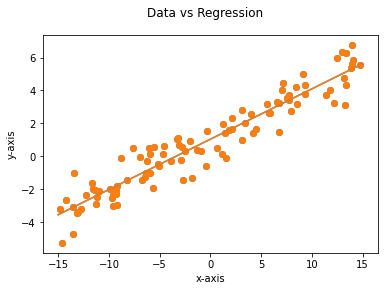

In [31]:
# https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification
#model_with_regularization = linear_model.Ridge(alpha=.5) # make model with Ridge regularization 
# https://numpy.org/doc/stable/reference/generated/numpy.logspace.html
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV
model_with_regularization = linear_model.RidgeCV(alphas=np.logspace(-5, 5, 15), normalize=True) # make model with Ridge regularization w/ built in cross validation

model_with_regularization.fit(X=reshaped_x, y=reshaped_y) # fit model to data 
model_without_regularization = model_one # model without regularization, already fitted 
# print coeficcients of two models for comparison 
print_model_fit(model_with_regularization) 
print_model_fit(model_without_regularization) 
# graph the two lines against the data 
linear_regression_against_data(model_with_regularization, reshaped_x, reshaped_y, MIN_X, MAX_X) 
linear_regression_against_data(model_without_regularization, reshaped_x, reshaped_y, MIN_X, MAX_X) 
# compare the two models
# compare r-values for training data (the model with regularization should have a lower r-value)
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
r_regularization_training = model_with_regularization.score(reshaped_x, reshaped_y)
r_standard_training = model_without_regularization.score(reshaped_x, reshaped_y)
r_diff_training = r_regularization_training-r_standard_training # this should be negative, because the model without regularization should perform better on the training data
print("Training data. With regularization: {}. Without regularization: {}. Diff: {}".format(r_regularization_training, r_standard_training, r_diff_training))
# compare r-values for test data
# generate test data 
ran_test_x = numpy.random.uniform(low=MIN_X, high=MAX_X, size=(NUM_INPUTS, 1)) 
test_dataset = pd.DataFrame(data=ran_test_x, columns=['x'])
test_dataset['y'] = 0.3*test_dataset['x']+1 # line is y = 0.3x + 1
# noise is added because the model without regularization should be overfitting to the specific noise of the training data
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html?highlight=numpy%20random%20normal#numpy.random.normal
noise_test_y = numpy.random.normal(scale=1.5, size=NUM_INPUTS) 
test_dataset['y'] = test_dataset['y']+noise_test_y  
test_reshaped_x = test_dataset['x'].values.reshape(-1, 1)
test_reshaped_y = test_dataset['y'].values.reshape(-1, 1)
# calculate r-values and print
r_regularization_testing = model_with_regularization.score(test_reshaped_x, test_reshaped_y)
r_standard_testing = model_without_regularization.score(test_reshaped_x, test_reshaped_y)
r_diff_testing = r_regularization_testing-r_standard_testing # this should be positive, because the model without regularization should be slightly overfitted
print("Test data. With regularization: {}. Without regularization: {}. Diff: {}".format(r_regularization_testing, r_standard_testing, r_diff_testing))


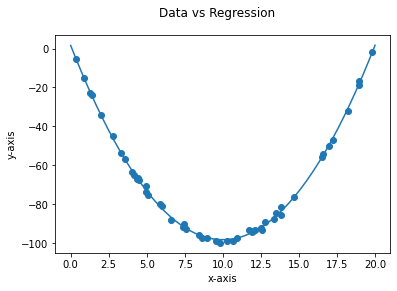

In [32]:
degree = 2 # quadratic 
model_polynomial=make_pipeline(PolynomialFeatures(degree), linear_model.RidgeCV(alphas=np.logspace(-5, 5, 15), normalize=True)) # make polynomial model with Ridge regularization w/ built in cross validation
# from my understanding, what the above code does is replace the matrix used for the regression with a polynomial version of it
model_polynomial.fit(x_quadratic, y_quadratic) # fit model
linear_regression_against_data(model_polynomial, x_quadratic, y_quadratic, MIN_X_QUAD, MAX_X_QUAD)

# Solutions for #3 & #4 Combined
I just used the same code as my second solution for #3, but instead of a regular linear model I used one with ridge regularization. 

# Adding Validation
1. The best r^2 value is 1 and the worst is 0. 
2. The model is getting a test r^2 value of 0.91 and not 1 due to the added noise.
3. The score for the test dataset is slightly lower than the training dataset: it is 0.89. This suggests that either there was slight overfitting or, because the difference is so low, it may just be due to the randomness of the noise.

Training r^2: 0.9059840739875882


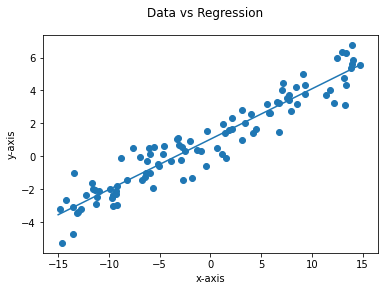

In [33]:
linear_regression_against_data(model_one, reshaped_x, reshaped_y, MIN_X, MAX_X)
print(f'Training r^2: {model_one.score(reshaped_x, reshaped_y)}')

Test r^2: 0.8870338783160612


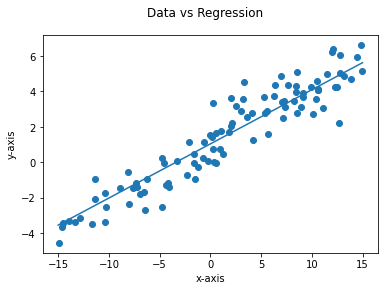

In [34]:
test_x = numpy.random.uniform(low=MIN_X, high=MAX_X, size=(NUM_INPUTS, 1)) 
test_dataset = pd.DataFrame(data=test_x, columns=['x'])
test_dataset['y'] = 0.3*test_dataset['x']+1 
test_noise_y = numpy.random.normal(scale=1.0, size=NUM_INPUTS) 
test_dataset['y'] = test_dataset['y']+test_noise_y 
test_x_reshaped = test_dataset['x'].values.reshape(-1, 1)
test_y_reshaped = test_dataset['y'].values.reshape(-1, 1)
linear_regression_against_data(model_one, test_x_reshaped, test_y_reshaped, MIN_X, MAX_X)
print(f'Test r^2: {model_one.score(test_x_reshaped, test_y_reshaped)}')